### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
#Load the Data
data = pd.read_csv('Downloads/coupons.csv')

2. Investigate the dataset for missing or problematic data.

In [3]:
#check data for nulls 
print(data.isna().sum())

#check data types
data.info()


destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  -----

3. Clean up nulls and nonnumeric data types

In [4]:
# Car column is problematic-  With less than 1% of car column populated the data set is too small and can be dropped.
data=data.drop('car',axis=1)

# Coupon Data (Bar, CarryAway, RestaurantLessThan20, Restaurant20to50) columns have some nulls, but < 2% are nan values, so it is safe to drop 
data=data.dropna()

#confirm actions with an info
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12079 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passanger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  object
 7   gender                12079 non-null  object
 8   age                   12079 non-null  object
 9   maritalStatus         12079 non-null  object
 10  has_children          12079 non-null  int64 
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  object
 14  Bar                   12079 non-null  object
 15  CoffeeHouse           12079 non-nul

In [5]:
#convert income to numerical data
# replace string values to and convert age columnn to integer type to enable analysis
data.loc[data.income == 'Less than $12500','income']='12500'
data.loc[data.income == '$12500 - $24999','income']='25000'
data.loc[data.income == '$100000 or More','income']='125000'
data.loc[data.income == '$37500 - $49999','income']='50000'
data.loc[data.income == '$50000 - $62499','income']='62500'
data.loc[data.income == '$62500 - $74999','income']='75000'
data.loc[data.income == '$87500 - $99999','income']='100000'
data.loc[data.income == '$75000 - $87499','income']='87500'
data.loc[data.income == '$25000 - $37499','income']='37500'

data.astype({'income': 'int64'}).dtypes
data = data.astype({"income": int})
print(data['income'].value_counts())


37500     1919
25000     1728
125000    1692
50000     1689
62500     1565
12500     1014
75000      840
100000     818
87500      814
Name: income, dtype: int64


In [6]:
# convert age to numerical data to simplify analysis
data.loc[data.age == '50plus','age']='51'
data.loc[data.age == 'below21','age']='19'
data.astype({'age': 'int64'}).dtypes
data = data.astype({"age": int})

data.astype({'age': 'int64'}).dtypes
data = data.astype({"age": int})
print(data['age'].value_counts())


21    2537
26    2399
31    1925
51    1732
36    1253
41    1065
46     664
19     504
Name: age, dtype: int64


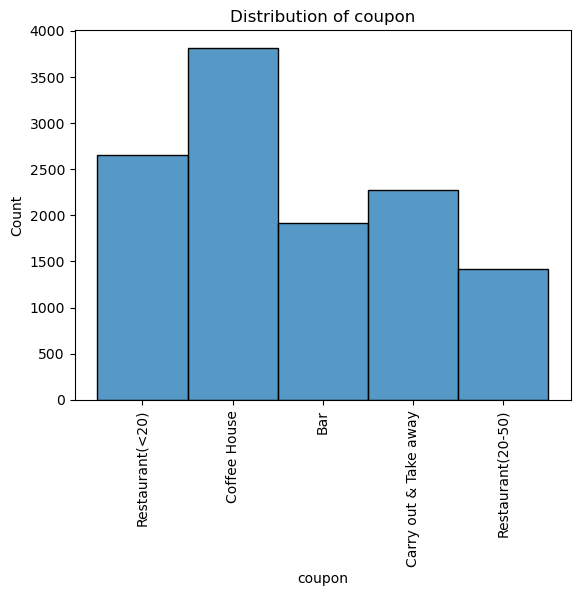

In [7]:
#histograms for time, coupone and expiration
h2=sns.histplot(data=data, x="coupon")
h2.set_title('Distribution of coupon')
plt.xticks(rotation=90);


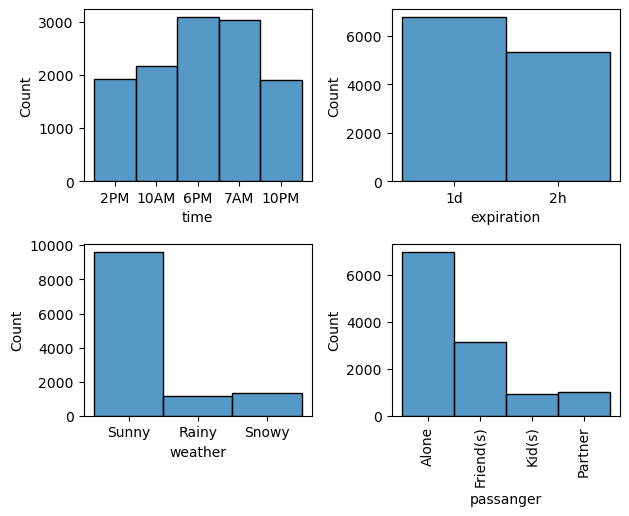

In [8]:
#histograms for time, expiration, weather, passanger using subplot

fig, axes = plt.subplots(2, 2)

#create boxplot in each subplot
sub=sns.histplot(data=data, x='time', ax=axes[0,0])
sub=sns.histplot(data=data, x='expiration', ax=axes[0,1])
sub=sns.histplot(data=data, x='weather', ax=axes[1,0])
sub=sns.histplot(data=data, x='passanger', ax=axes[1,1])
sub.figure.tight_layout()
plt.xticks(rotation=90);

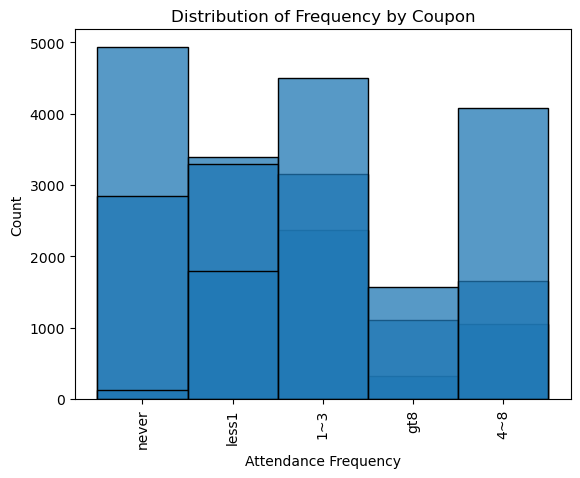

In [9]:
#histogram of all coupons.  Each stacked bar represents a coupon type.  

h3=sns.histplot(data=data, x="Bar")
h3=sns.histplot(data=data, x="CoffeeHouse")
h3=sns.histplot(data=data, x="CarryAway")
h3.set_title('Distribution of Frequency by Coupon')
h3.set_xlabel('Attendance Frequency')
h3.plot(subplots=True, layout=(1,2))
plt.xticks(rotation=90);



<AxesSubplot:xlabel='time', ylabel='Count'>

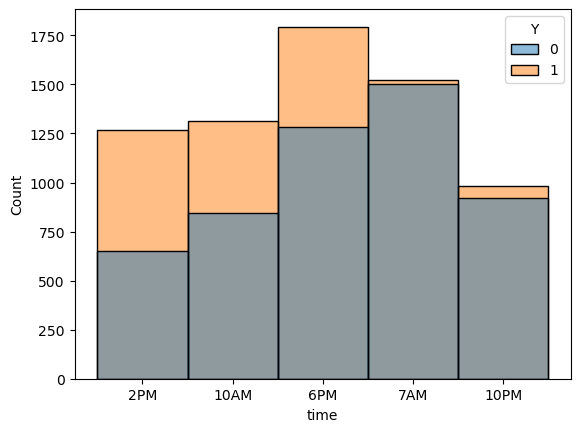

In [10]:
#histogram of time showing acceptance
sns.histplot(data=data,x='time',hue='Y')

<AxesSubplot:xlabel='temperature', ylabel='Density'>

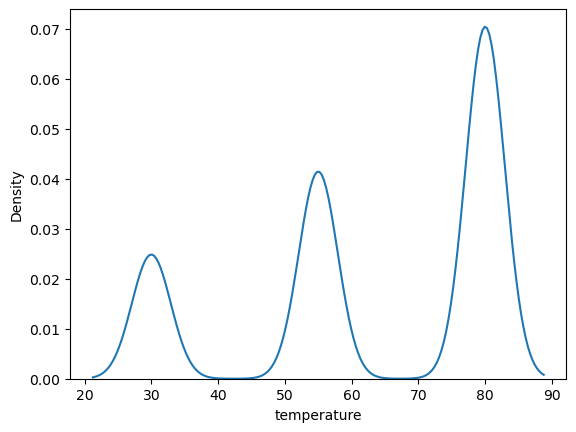

In [11]:
# kernel densite plot of temperature
sns.kdeplot(data=data['temperature'])

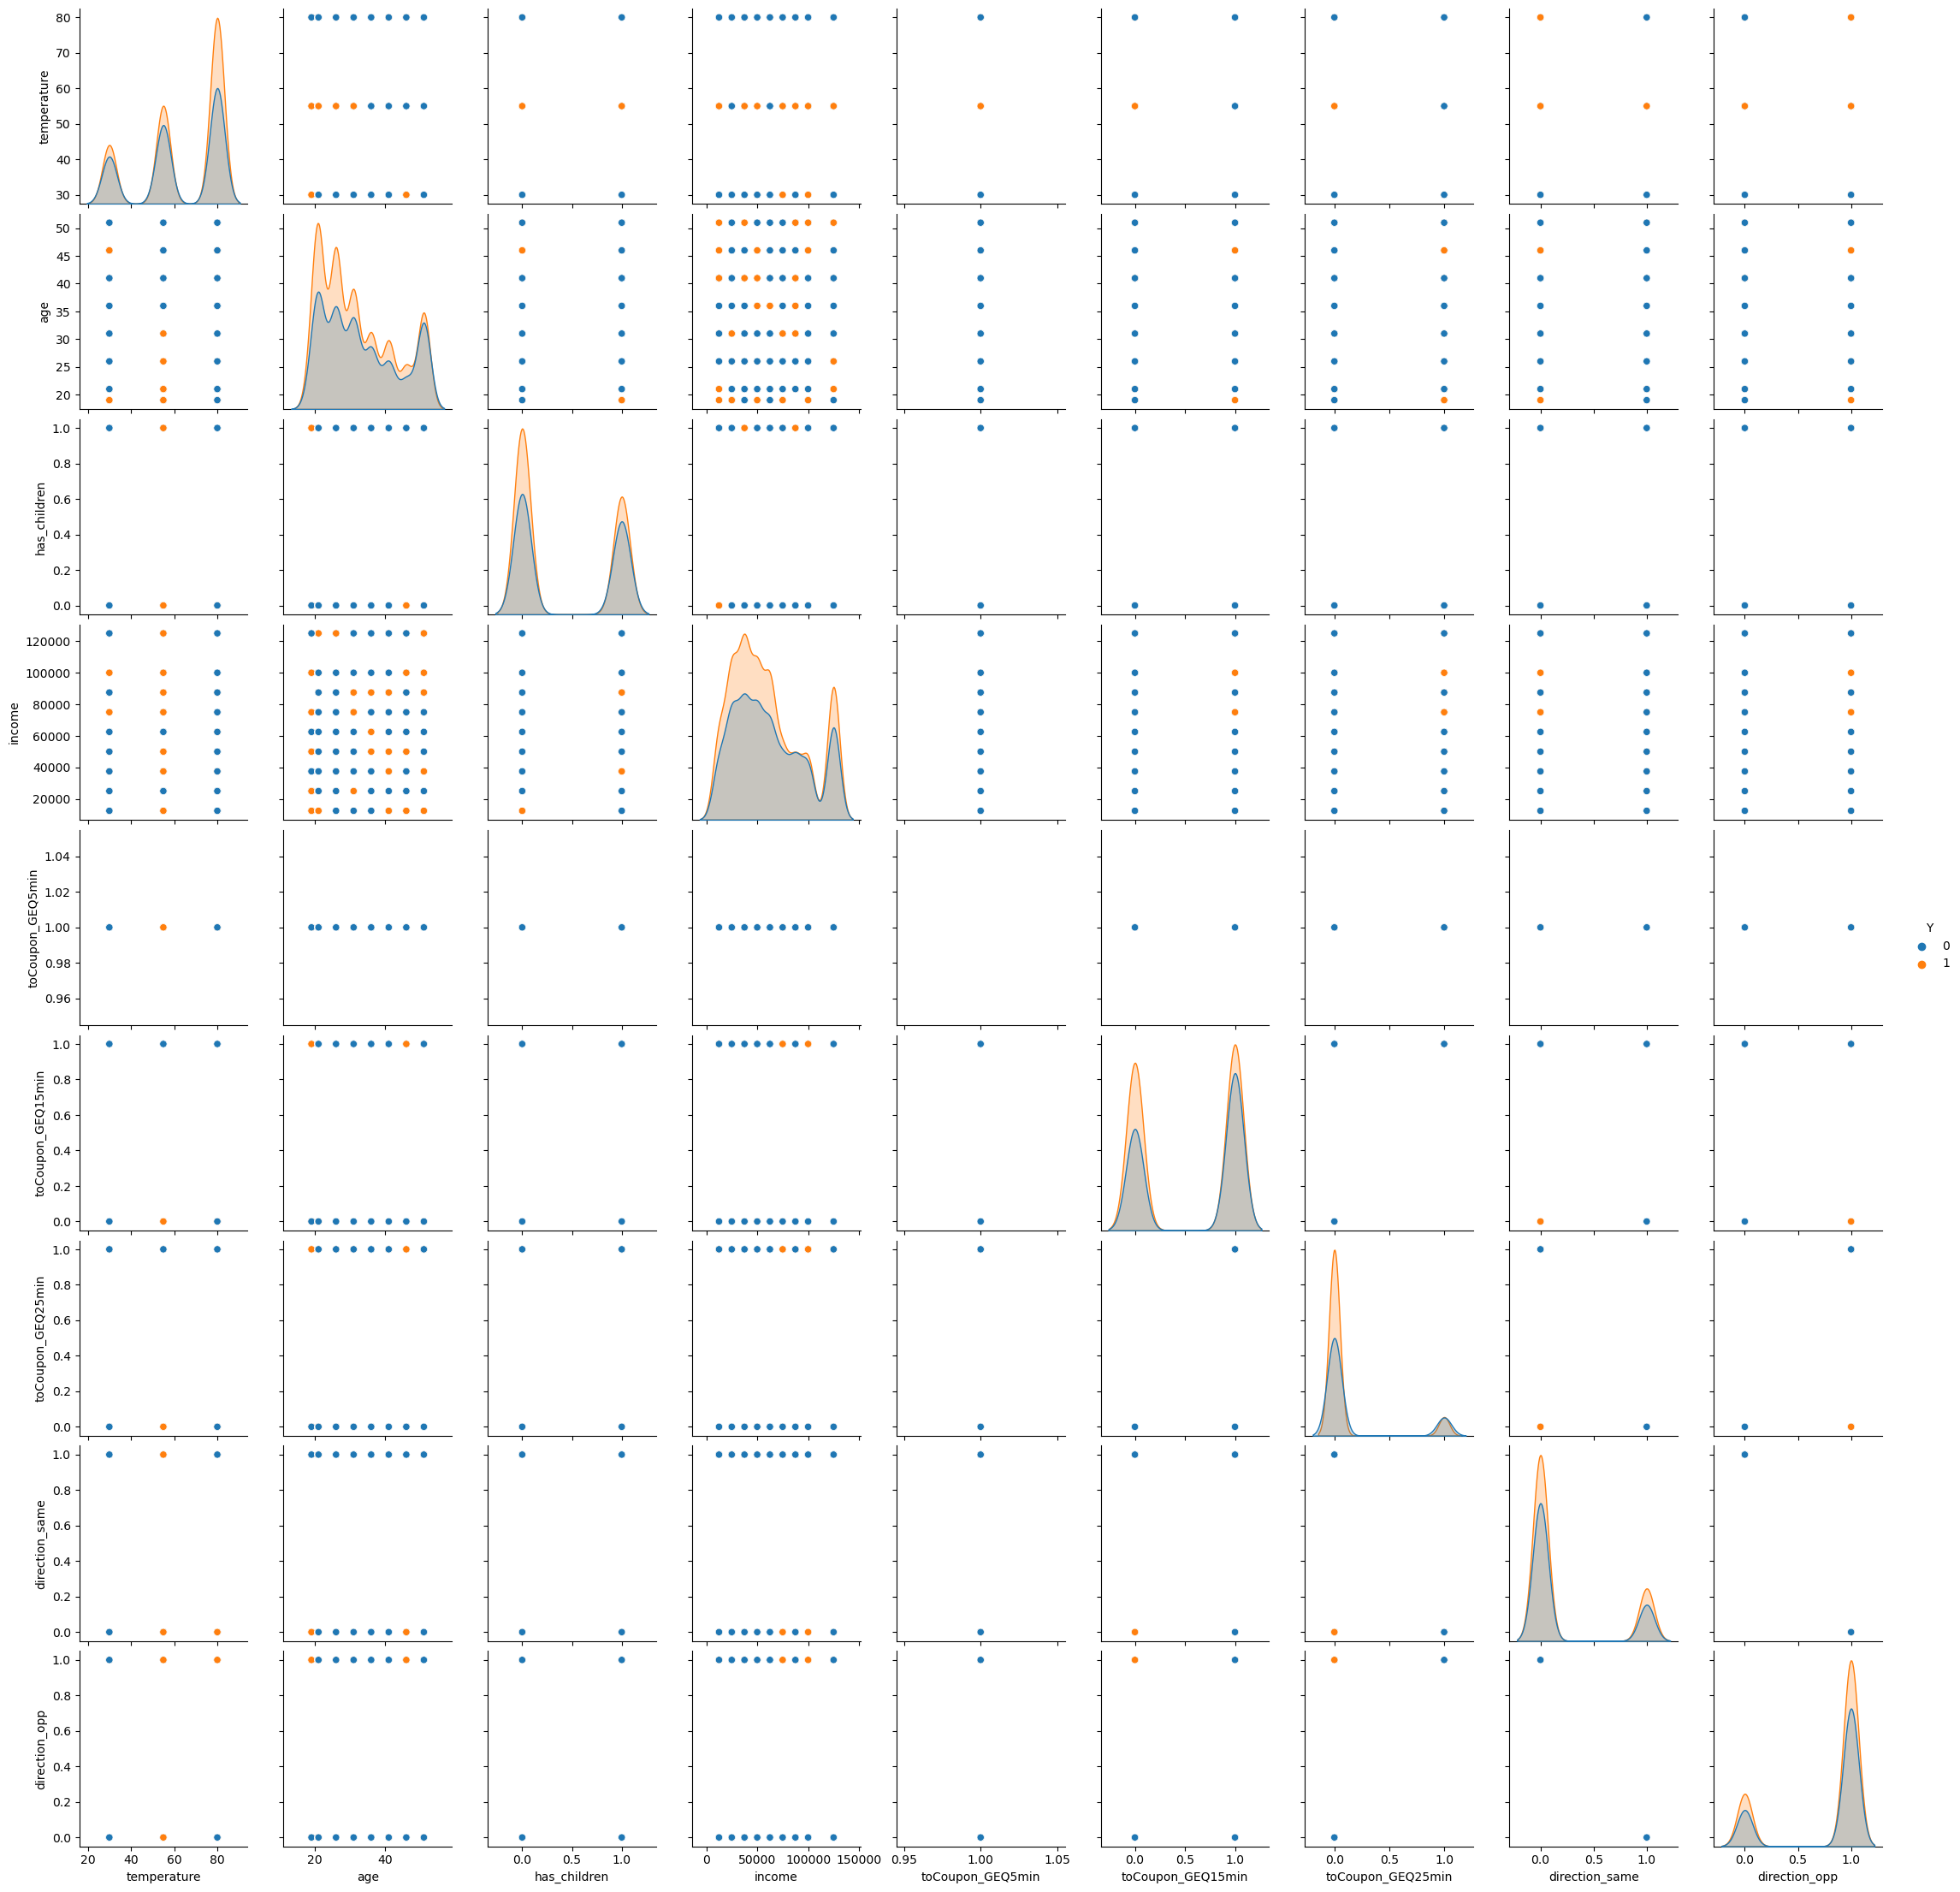

In [12]:
#Pair plot to look for correlations to coupon accepted ('Y')
sns.pairplot(data,hue="Y")
# Look for correlations to identify key variables and eliminate highly correlated variables

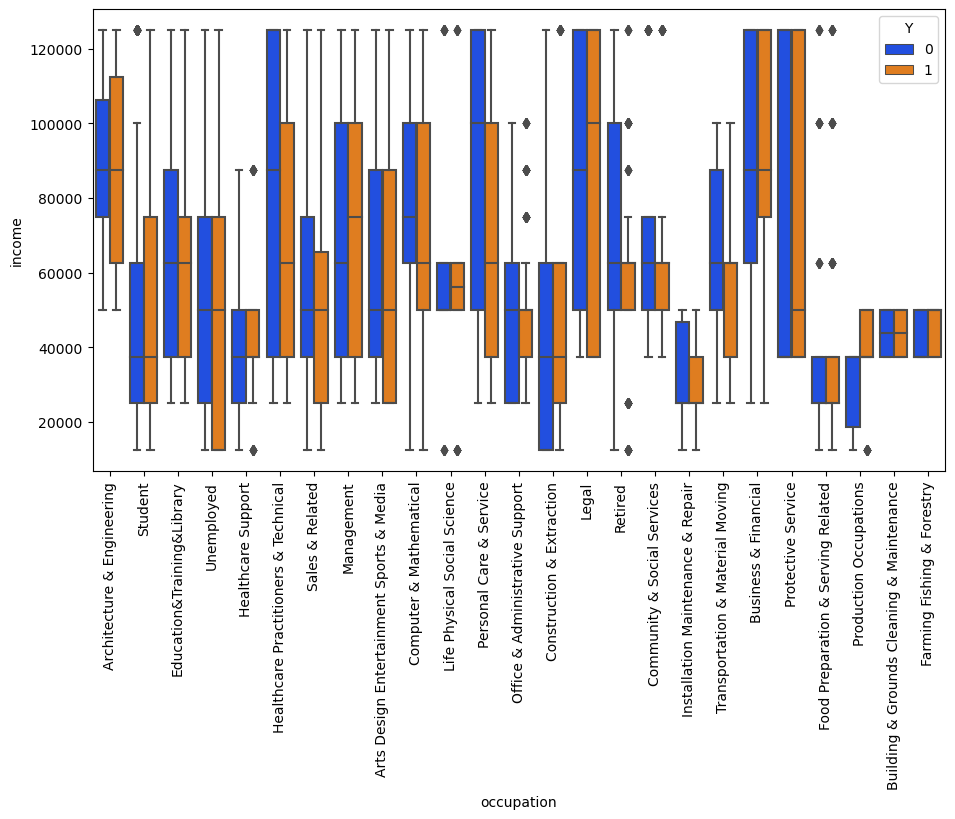

In [13]:
#plot income by occupation to look for correlation of income and occupation
fig, axz = plt.subplots(figsize=(11, 6))
axz=sns.boxplot(
    x='occupation', 
    y='income', 
    data=data,
    palette='bright',
    hue='Y');
axz.tick_params(axis='x', rotation=90)
plt.show()

4. What proportion of the total observations chose to accept the coupon?

In [14]:
# Yes is 1, and No is 0, we can take the sum over the length of the column to get the total number accepted:
general_accept_rate=(int(100*(data["Y"].sum()/data["Y"].shape[0])))
print(general_accept_rate,'% of total observations were Accepted')

56 % of total observations were Accepted


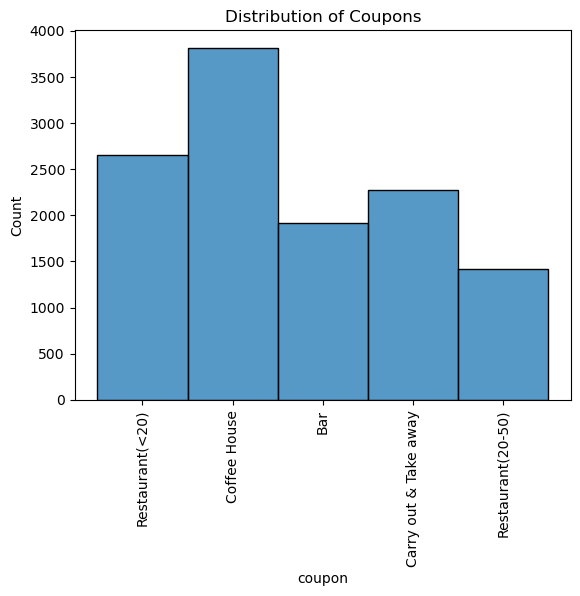

In [15]:
# was not sure if a histogram counted as a bar plot, though I think this looks neater:

ax55=sns.histplot(data=data,x='coupon',multiple='dodge',legend='upper right')
ax55.set_title('Distribution of Coupons')
ax55.set_ylabel('Count')
ax55.tick_params(axis='x', rotation=90)
ax55.set_ylim()
ax55.plot();


5. Use a bar plot to visualize the `coupon` column.

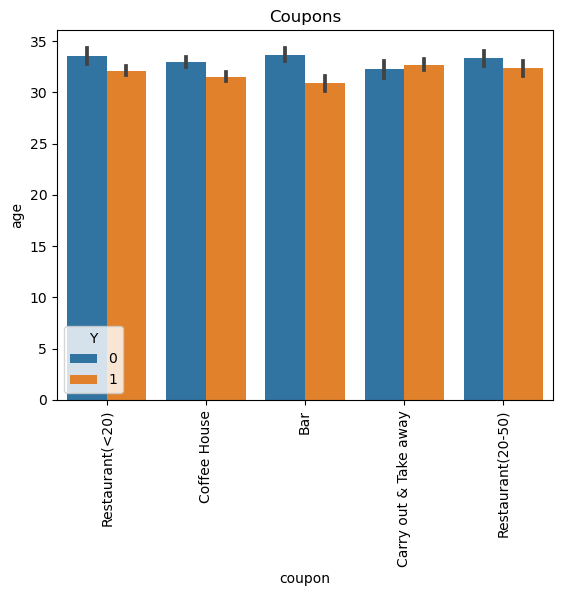

In [16]:
# Here is a bar plot, if that is required:

ax5=sns.barplot(data=data, x="coupon", y="age",hue='Y')
ax5.set_title('Coupons')
ax5.tick_params(axis='x', rotation=90)



6. Use a histogram to visualize the temperature column.

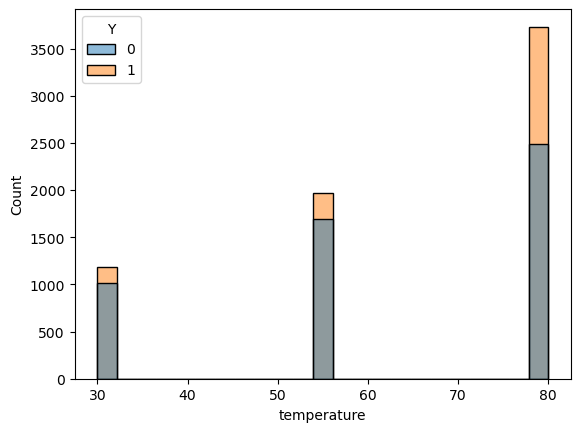

In [17]:
# temperature histogram
sns.histplot(data=data, x="temperature",hue='Y');

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1913 entries, 24 to 12682
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           1913 non-null   object
 1   passanger             1913 non-null   object
 2   weather               1913 non-null   object
 3   temperature           1913 non-null   int64 
 4   time                  1913 non-null   object
 5   coupon                1913 non-null   object
 6   expiration            1913 non-null   object
 7   gender                1913 non-null   object
 8   age                   1913 non-null   int64 
 9   maritalStatus         1913 non-null   object
 10  has_children          1913 non-null   int64 
 11  education             1913 non-null   object
 12  occupation            1913 non-null   object
 13  income                1913 non-null   int64 
 14  Bar                   1913 non-null   object
 15  CoffeeHouse           1913 non-null 

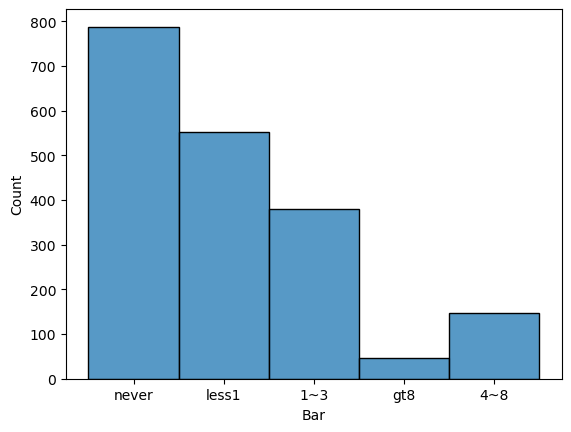

In [18]:
#create new data frame with only entries that specify Bar coupons
bardata=data.loc[data['coupon'] == "Bar"]
# use histogram and info to confirm dataset looks reasonable
# and that distribution of values of Bar look sane.  gt8 value looks slightly low, but is reasonable for our use case
sns.histplot(data=bardata,x='Bar')
bardata.info()

4. What proportion of the total observations chose to accept the coupon? 



In [19]:
total=(int(100*(data["Y"].sum()/data["Y"].shape[0])))
print(total,'% of all coupons were accepted from the intial data set')

56 % of all coupons were accepted from the intial data set


2. What proportion of bar coupons were accepted?


In [20]:
# Use the bardata data frame which is filtered for bar coupons
#calculate sum of yes's for bar coupons divided by length (shape) of column
bar_accept=int((100*bardata[['Y']].loc[bardata['Y'] == 1].sum())/((bardata['Y'].shape[0])))
print(bar_accept,'% of bar coupons were Accepted')

41 % of bar coupons were Accepted


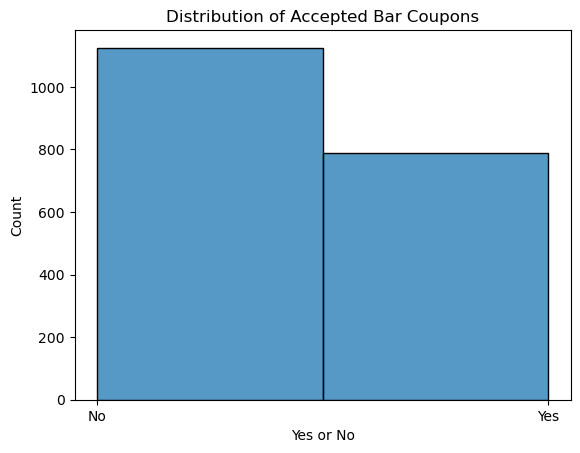

In [21]:
#use seaborn histogram to show answer to question
axb=sns.histplot(data=bardata, x="Y",bins=2)
axb.set_title("Distribution of Accepted Bar Coupons")
axb.set_xlabel("Yes or No")
axb.set_xticks(range(2))
axb.set_xticklabels(['No','Yes']);

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [22]:
# Use list to parse out cohorts of responders based on bar attendence frequency
# See histogram on In[17] for range of values

visits=('4~8','gt8')

# Acceptance rate calculated as the sum of accepts for cohort that visits more than 3x month 
# divided by the number of rows (i.e. shape[0]) in the parsed column
ratio3x=int(100*((bardata.loc[(bardata.Bar.isin(visits))]['Y'].sum())/(bardata.loc[(bardata.Bar.isin(visits))]['Y'].shape[0])))

# Same calculation for values that are NOT found in the list of visits, using tilda ~ to invert the results
ratio_lt_3x=int(100*(bardata.loc[~(bardata.Bar.isin(visits))]['Y'].sum())/(bardata.loc[~(bardata.Bar.isin(visits))]['Y'].shape[0]))

#print results- note that results do not add up to 100% because they are unique cohorts
print('Frequent bar goers accept',ratio3x,'% of coupons.','\n')
print('Less Frequent bar goers accept',ratio_lt_3x,'% of coupons.','\n')

Frequent bar goers accept 76 % of coupons. 

Less Frequent bar goers accept 37 % of coupons. 



4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [23]:


# use list to extract folk who go to a bar at least once a month
barfly=('1~3','4~8','gt8')

#Use sum/shape to calculate acceptance percent rate
ratio_gt25_gt1x=int(100*(bardata.loc[(bardata.Bar.isin(barfly))& (bardata.age > 25)]['Y'].sum())/(bardata.loc[(bardata.Bar.isin(barfly))& (bardata.age > 25)]['Y'].shape[0]))

# Same calculation for values that are NOT found in the list of visits, using tilda ~ to invert the results
ratio_others=int(100*(bardata.loc[~(bardata.Bar.isin(barfly))& (bardata.age < 25)]['Y'].sum())/(bardata.loc[~(bardata.Bar.isin(barfly))& (bardata.age < 25)]['Y'].shape[0]))

print('Frequent bar goers over 25 accepted ',ratio_gt25_gt1x,'% of coupons')
print('The remaining folks accepted ',ratio_others,'% of coupons')

Frequent bar goers over 25 accepted  68 % of coupons
The remaining folks accepted  38 % of coupons


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [24]:
# use list to isolate requested occupation and passenger cohorts
f=('Farming Fishing & Forestry','Kid(s)')

cohort_5=int(100*((bardata.loc[~bardata.occupation.isin(f)&(~bardata.passanger.isin(f)) & (bardata.Bar.isin(barfly))]['Y'].sum())/(bardata.loc[~bardata.occupation.isin(f)&(~bardata.passanger.isin(f)) & (bardata.Bar.isin(barfly))]['Y'].shape[0])))

print(cohort_5)
print('The cohort describted accepted',cohort_5,'% of coupons')


70
The cohort describted accepted 70 % of coupons


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [25]:
# Of the the three choices above, I calculated 1x month and > 30 years old

#use list to parse folks that go to bars less than once a month
lt1x_month=('never','less1')

# use sum over shape on filter of < 1x month and under 30
ratio_less1_under30=int(100*(bardata.loc[(bardata.Bar.isin(lt1x_month))& (bardata.age < 30)]['Y'].sum())/(bardata.loc[(bardata.Bar.isin(lt1x_month))& (bardata.age <30 )]['Y'].shape[0]))

print('Folks that went to bars more than 1x a month under the age of 30 accepted',ratio_less1_under30,'% of their coupons')

Folks that went to bars more than 1x a month under the age of 30 accepted 34 % of their coupons


In [26]:
### Create a new data frame with all of the above results to simplify plotting with Seaborn

cohort_dict={'General':general_accept_rate,'Over_25_Monthly_Bar_Goers':ratio_gt25_gt1x,'No_Kids':cohort_5,'Less_than_1x_<_30':ratio_less1_under30}
#df_cohort=pd.DataFrame(cohort_dict,index=[])
df_cohort=pd.DataFrame.from_dict(cohort_dict,orient='index')
df_cohort.rename( columns={0 :'Accept_Rate'}, inplace=True )
print(len(df_cohort.columns))

if len(df_cohort.columns) == 1:
  df_cohort.reset_index(inplace=True)
  df_cohort=df_cohort.rename(columns={'index': 'Cohort'})

print(df_cohort.head())





1
                      Cohort  Accept_Rate
0                    General           56
1  Over_25_Monthly_Bar_Goers           68
2                    No_Kids           70
3          Less_than_1x_<_30           34


[]

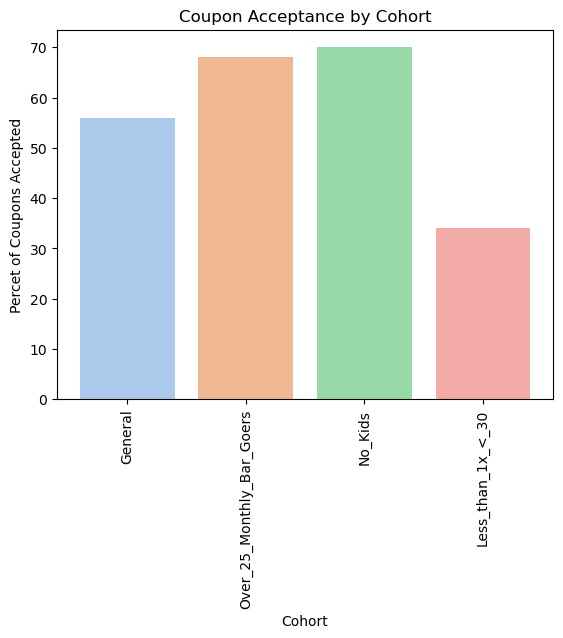

In [27]:
#plot with Seaborn
sns.set_palette("pastel")
ax7=sns.barplot(data=df_cohort,x='Cohort',y='Accept_Rate')
ax7.set_title('Coupon Acceptance by Cohort')
ax7.set_ylabel('Percet of Coupons Accepted')
ax7.tick_params(axis='x', rotation=90)
ax7.set_ylim()
ax7.plot()

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [28]:
print('The data above shows that drivers who regularly go to bars several times a month, and drivers with no children, accept the bar coupons more frequently. ')  
print('It is clear from the data that folks who frequent a venue are more likely to accept coupons for that venue, whether it is a bar or otherwise.')

The data above shows that drivers who regularly go to bars several times a month, and drivers with no children, accept the bar coupons more frequently. 
It is clear from the data that folks who frequent a venue are more likely to accept coupons for that venue, whether it is a bar or otherwise.


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [29]:
# Our strategy will be to stack highly engaged cohorts to see if we can drive acceptance up.  
# The charts that follow identify highly engaged cohorts, which we will stack later.

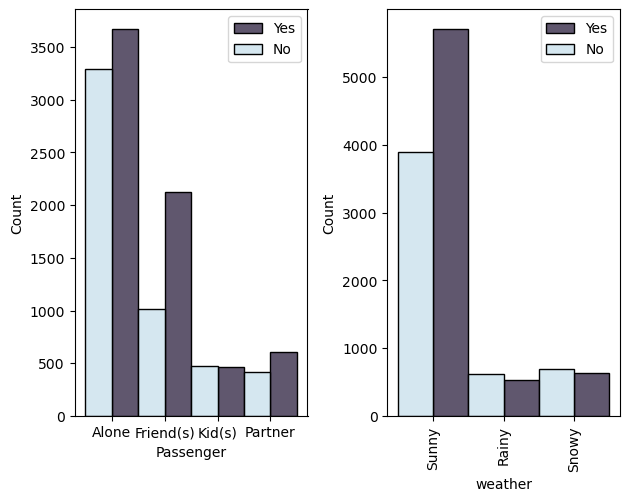

In [30]:
fig, axes = plt.subplots(ncols=2)

#create boxplot in each subplot
sub2=sns.histplot(data, x='passanger', hue='Y', multiple='dodge',palette="ch:s=.25,rot=-.25",ax=axes[0])
sub2.set_xlabel('Passenger')
axes[0].legend(labels=["Yes","No"])

sub2=sns.histplot(data, x='weather', hue='Y', multiple='dodge',palette="ch:s=.25,rot=-.25",ax=axes[1])
sub2.figure.tight_layout()
plt.xticks(rotation=90)
axes[1].legend(labels=["Yes","No"])
plt.show()
sub2.figure.savefig('/var/local/data/Customer_Coupon/images/weather_passenger.png')


73 % of all Carry Away coupns were Accepted.


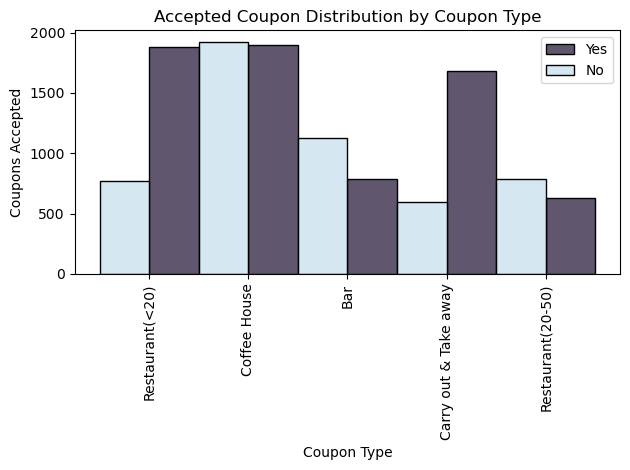

In [31]:
# Take out and cheap restaurants are the most highly engaged coupon types.
# Note that we will end up driving engagement across all coupon types in order to maintain the largest cohort
# This chart will not be stacked, but is used for reference
# We will be able to exceed the highest acceptance rate on this histogram by stacking other attributes
axcoupon = sns.histplot(data, x='coupon', hue='Y', multiple='dodge',palette="ch:s=.25,rot=-.25")
axcoupon.tick_params(axis='x', rotation=90)
axcoupon.set_title('Accepted Coupon Distribution by Coupon Type')
axcoupon.set_ylabel('Coupons Accepted')
axcoupon.set_xlabel('Coupon Type')
axcoupon.tick_params(axis='x', rotation=90)
axcoupon.legend(labels=["Yes","No"])
axcoupon.figure.tight_layout()
axcoupon.figure.savefig('/var/local/data/Customer_Coupon/images/coupon.png')

carry=('Carry out & Take away','not-used')

dfca=(data.loc[(data.coupon.isin(carry))])
carry_away=int(100*(dfca["Y"].sum()/dfca["Y"].shape[0]))
print(carry_away,'% of all Carry Away coupns were Accepted.')

66 % of all coupons were Accepted between 2PM and 6PM


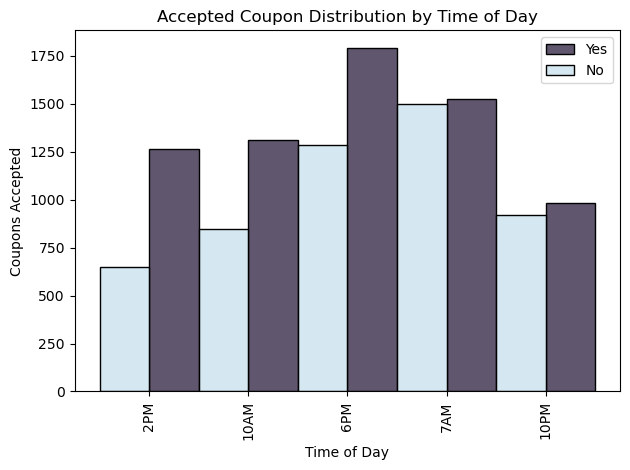

In [32]:
# 2PM to 6PM is the most active time as shown below
axtime = sns.histplot(data, x='time', hue='Y', multiple='dodge',palette="ch:s=.25,rot=-.25")
axtime.set_title('Accepted Coupon Distribution by Time of Day')
axtime.set_ylabel('Coupons Accepted')
axtime.set_xlabel('Time of Day')
axtime.tick_params(axis='x', rotation=90)
axtime.legend(labels=["Yes","No"])
axtime.figure.tight_layout()
axtime.figure.savefig('/var/local/data/Customer_Coupon/images/time.png')

pm=('2PM','not used')

dfpm=(data.loc[(data.time.isin(pm))])
pm_accepted=int(100*(dfpm["Y"].sum()/dfpm["Y"].shape[0]))
print(pm_accepted,'% of all coupons were Accepted between 2PM and 6PM')


64 % of Coffee coupons were by folks who attend Coffee Houses 1-8 times.


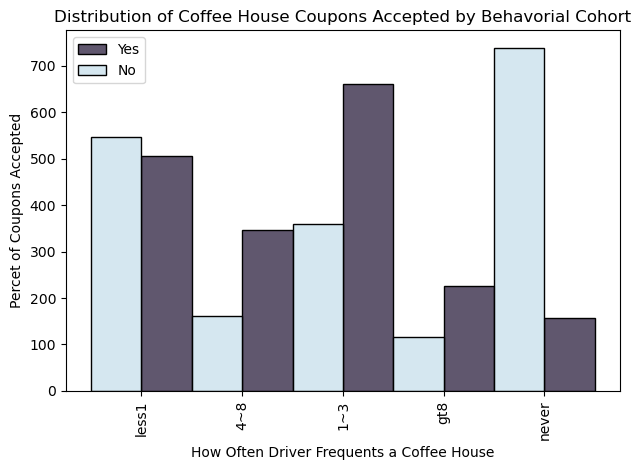

In [33]:
# Users who frequent a venue tend to engage at higher rates
# The chart below of Coffee House engagement is one example

axcoffee = sns.histplot(data.loc[data.coupon == 'Coffee House'], x='CoffeeHouse',hue='Y', multiple='dodge',palette="ch:s=.25,rot=-.25")
axcoffee.tick_params(axis='x', rotation=90)
axcoffee.set_title('Distribution of Coffee House Coupons Accepted by Behavorial Cohort')
axcoffee.set_ylabel('Percet of Coupons Accepted')
axcoffee.set_xlabel('How Often Driver Frequents a Coffee House')
axcoffee.tick_params(axis='x', rotation=90)
axcoffee.legend(labels=["Yes","No"])
axcoffee.figure.tight_layout()
#axcoffee.figure.savefig('/var/local/data/Customer_Coupon/images/CoffeeHouse.png')

freq=('4~8','1~3')

dffq=(data.loc[(data.CoffeeHouse.isin(freq))])
fq_accepted=int(100*(dffq["Y"].sum()/dffq["Y"].shape[0]))
print(fq_accepted,'% of Coffee coupons were by folks who attend Coffee Houses 1-8 times.')


In [34]:
#Calculate ratio of Accepted Coupons per Occupation


#Create DataFrame with Accept Data by occupation
dfoy= pd.DataFrame((data.loc[data.Y == 1][['Y','occupation']].groupby('occupation').value_counts()))

# Name the new columns
dfoy.index = dfoy.index.set_names(['Occupation', 'Y'])

# Reindex the datafame
dfoy.reset_index(inplace=True)

#Name the new column
dfoy.columns = ['Occupation', 'Y', 'Accepted']

# Drop the Y column because it is redundant
dfoy=dfoy.drop(columns=['Y'])

#Repeat for declined coupons
dfon= pd.DataFrame((data.loc[data.Y == 0][['Y','occupation']].groupby('occupation').value_counts()))
dfon.index = dfon.index.set_names(['Occupation', 'Y'])
dfon.reset_index(inplace=True)
dfon.columns = ['Occupation', 'Y', 'Rejected']
dfon=dfon.drop(columns=['Y'])

#Merge the two dataframes
dfo=pd.merge(dfoy,dfon,on='Occupation')
dfo['Accept_Rate']=(100*(dfo['Accepted']/(dfo['Accepted']+dfo['Rejected']))).astype(int)
dfo=dfo.sort_values(by=['Accept_Rate'])
print(dfo.head())
    
    
    
    


                           Occupation  Accepted  Rejected  Accept_Rate
20                            Retired       216       257           45
13                              Legal       103       116           47
4         Community & Social Services       109       110           49
7          Education&Training&Library       439       416           51
12  Installation Maintenance & Repair        71        62           53


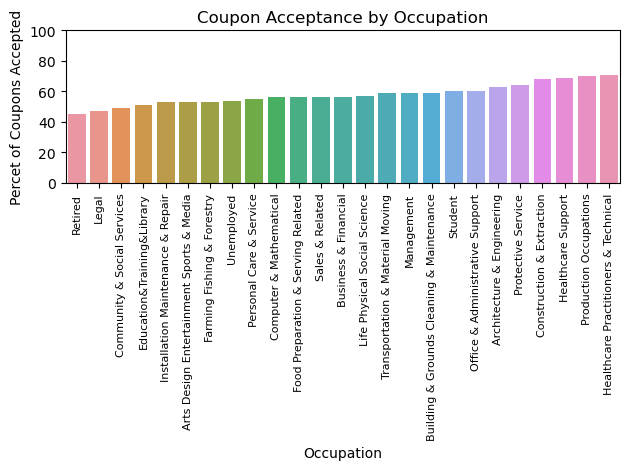

In [35]:
#plot the data
sns.set_palette("bright") 
axoccupation=sns.barplot(data=dfo,x='Occupation', y='Accept_Rate') 
axoccupation.set_title('Coupon Acceptance by Occupation') 
axoccupation.set_ylabel('Percet of Coupons Accepted',fontsize=10) 
axoccupation.set_xlabel('Occupation',fontsize=10) 
axoccupation.tick_params(axis='x', rotation=90,labelsize=8) 
axoccupation.set_ylim(0,100) 
axoccupation.figure.tight_layout()
axoccupation.figure.savefig('/var/local/data/Customer_Coupon/images/occupation.png')


In [36]:
# Stack Cohorts to drive up coupon acceptance/engagement


#use dictionaries to filter results
targets=('Sunny','Healthcare Support','Healthcare Practitioners & Technical','Friend(s)','2PM')

# get accept rate for 2PM time block
dft=(data.loc[(data.time.isin(targets))])
ctime= int(100*(dft["Y"].sum()/dft["Y"].shape[0]))
print(ctime,'% of total observations were Accepted at 2pm')

# get accept rate for passsenger is a Friend
dfp=(data.loc[(data.passanger.isin(targets))])
passenger= int(100*(dfp["Y"].sum()/dfp["Y"].shape[0]))
print(passenger,'% of total observations were Accepted by drivers with a passenger')

#get accept rate for healthcare workers
dfh=(data.loc[(data.occupation.isin(targets))])
hc_workers=int(100*(dfh["Y"].sum()/dfh["Y"].shape[0]))
print(hc_workers,'% of total observations were Accepted by healthcare workers')

#get accept rate for healthcare workers in 2pm time block
dfht=(dfh.loc[(dfh.time.isin(targets))])
hc_workers_time=int(100*(dfht["Y"].sum()/dfht["Y"].shape[0]))
print(hc_workers_time,'% of total observations were Accepted at 2pm by healthcare workers')

#get accept rate for healthcare workers with a friend as a passenger
dfhp=(dfh.loc[(dfh.passanger.isin(targets))])
hc_workers_passenger= int(100*(dfhp["Y"].sum()/dfhp["Y"].shape[0]))
print(hc_workers_passenger,'% of total observations were Accepted by healthcare workers with a passenger')

#get accept rate for healthcare workers with a friend as a passenger in the 2pm block
dfhpt=(dfhp.loc[(dfhp.time.isin(targets))])
hc_workers_passenger_time= int(100*(dfhpt["Y"].sum()/dfhpt["Y"].shape[0]))
print(hc_workers_passenger_time,'% of total observations were Accepted by healthcare worker with a passenger at 2pm')

# Code below can be used as a test.  Result should be same as above (93%)
#dfhtp=(dfht.loc[(dfht.passanger.isin(targets))])
#hc_passenger_workers_time= int(100*(dfhtp["Y"].sum()/dfhtp["Y"].shape[0]))
#print(hc_passenger_workers_time,'% of total observations were Accepted by healthcare worker with a passenger at 2pm')



66 % of total observations were Accepted at 2pm
67 % of total observations were Accepted by drivers with a passenger
70 % of total observations were Accepted by healthcare workers
86 % of total observations were Accepted at 2pm by healthcare workers
84 % of total observations were Accepted by healthcare workers with a passenger
93 % of total observations were Accepted by healthcare worker with a passenger at 2pm


In [37]:
#build new dataframe and populate with data calculated above for plotting the results of our "stack"

df_new=pd.DataFrame([{'All Coupons':'', "2PM":'','Passengers':'','H_Workers':'','HW_Friend':'','HW_2PM':'','HW_Friend_2PM':''}])
df_new[0:]=[general_accept_rate,ctime,passenger,hc_workers,hc_workers_passenger,hc_workers_time,hc_workers_passenger_time]

print(df_new)


  All Coupons 2PM Passengers H_Workers HW_Friend HW_2PM HW_Friend_2PM
0          56  66         67        70        84     86            93


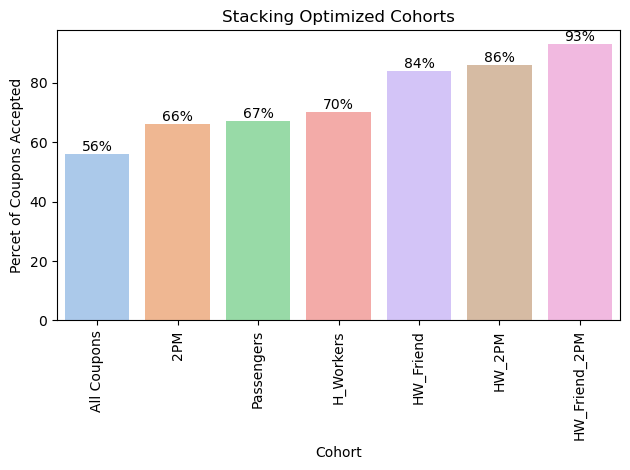

In [38]:
# plot the results 
sns.set_palette("pastel")
axhc=sns.barplot(data=df_new)
axhc.set_title('Stacking Optimized Cohorts')
axhc.set_ylabel('Percet of Coupons Accepted')
axhc.set_xlabel('Cohort')
axhc.tick_params(axis='x', rotation=90)
axhc.bar_label(axhc.containers[0], fmt='%.f%%');
axhc.figure.tight_layout()
axhc.figure.savefig('/var/local/data/Customer_Coupon/images/summary.png')

